Title: Regression Models

Polynomial Regression

Task 1: Apply polynomial regression to a dataset showing the relationship between age and income.

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


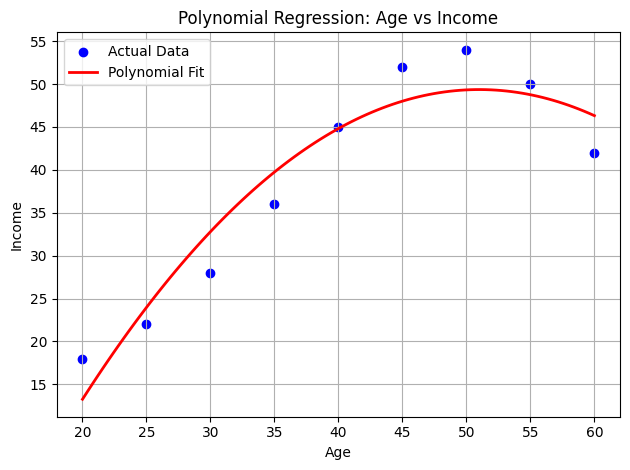

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


data = pd.DataFrame({
    'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60],
    'Income': [18, 22, 28, 36, 45, 52, 54, 50, 42]
})

X = data[['Age']]  # feature
y = data['Income']  # target


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 3. Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# 4. Predict for plotting
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_pred = model.predict(X_fit_poly)


plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_pred, color='red', linewidth=2, label='Polynomial Fit')
plt.title('Polynomial Regression: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Task 2: Explore and visualize a higher-degree polynomial fitting compared to a simple linear regression.

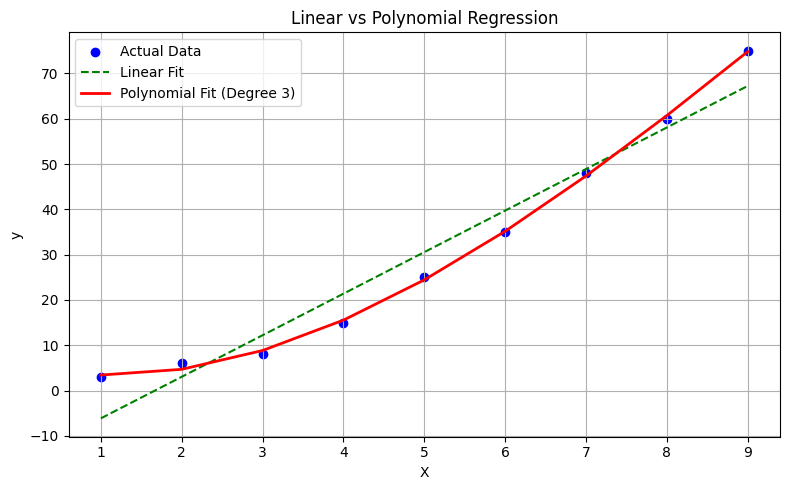

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data (non-linear relationship)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([3, 6, 8, 15, 25, 35, 48, 60, 75])  # clearly non-linear

# Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)

# Polynomial Regression Model (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Plotting both models
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_lin, color='green', linestyle='--', label='Linear Fit')
plt.plot(X, y_pred_poly, color='red', linewidth=2, label='Polynomial Fit (Degree 3)')
plt.title('Linear vs Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Task 3: Dataset with cyclical patterns such as tides or circadian cycles.

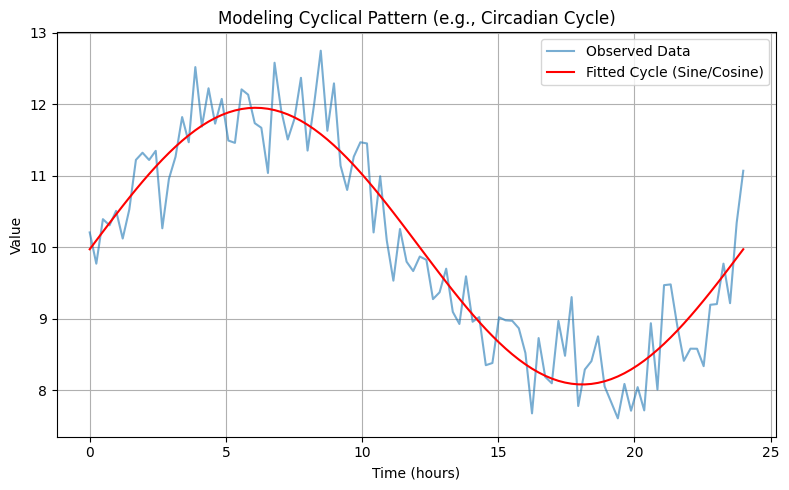

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulated time data (e.g., hours or days)
t = np.linspace(0, 24, 100)  # 0 to 24 hours, e.g. circadian cycle

# Simulate cyclical pattern: e.g., body temperature or tidal pattern
y = 10 + 2 * np.sin(2 * np.pi * t / 24) + 0.5 * np.random.randn(len(t))

# Feature engineering: add sine and cosine terms to capture cycles
X = np.column_stack([
    np.sin(2 * np.pi * t / 24),
    np.cos(2 * np.pi * t / 24)
])

# Fit linear model using cyclical features
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot original and predicted values
plt.figure(figsize=(8, 5))
plt.plot(t, y, label='Observed Data', alpha=0.6)
plt.plot(t, y_pred, label='Fitted Cycle (Sine/Cosine)', color='red')
plt.title('Modeling Cyclical Pattern (e.g., Circadian Cycle)')
plt.xlabel('Time (hours)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
